<a href="https://colab.research.google.com/github/gar22891uvg/ProyectoFinalGRP4/blob/main/GRP4ProyectoFinal_JAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
import warnings;
warnings.simplefilter('ignore')

In [291]:
import prophet
from prophet import Prophet

In [292]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Python


Proyecto Final
Grupo 4
Feature Engineering
Victor De Leon
Jaime Garcia


In [293]:
df = pd.read_csv('REC4.csv',parse_dates=True)

In [294]:
df.head(5)

,FECHA,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
0,01-Nov-22,Internac,1,13997,1157375,155
1,01-Nov-22,direct1,2,9666,168465,163
2,01-Nov-22,dist1,3,9172,137949,164
3,01-Nov-22,digi1,4,3494,83306,154
4,01-Nov-22,online2,6,3251,80198,100


In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   FECHA    5175 non-null   object
 1   NOMBRE   5175 non-null   object
 2   CODIGO   5175 non-null   int64 
 3   TRAFICO  5175 non-null   int64 
 4   CANT     5175 non-null   int64 
 5   DELAY    5175 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 242.7+ KB


In [296]:
df = pd.read_csv('REC4.csv',parse_dates=True,index_col=0)

In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOMBRE   5175 non-null   object
 1   CODIGO   5175 non-null   int64 
 2   TRAFICO  5175 non-null   int64 
 3   CANT     5175 non-null   int64 
 4   DELAY    5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [298]:
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5175 entries, 2022-11-01 to 2023-05-12
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NOMBRE   5175 non-null   object
 1   CODIGO   5175 non-null   int64 
 2   TRAFICO  5175 non-null   int64 
 3   CANT     5175 non-null   int64 
 4   DELAY    5175 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 242.6+ KB


In [299]:
df.head(5)

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
FECHA,,,,,
2022-11-01,Internac,1,13997,1157375,155
2022-11-01,direct1,2,9666,168465,163
2022-11-01,dist1,3,9172,137949,164
2022-11-01,digi1,4,3494,83306,154
2022-11-01,online2,6,3251,80198,100


In [300]:
df.index.year.unique()

Int64Index([2022, 2023], dtype='int64', name='FECHA')

In [301]:
df.head(5)

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY
FECHA,,,,,
2022-11-01,Internac,1,13997,1157375,155
2022-11-01,direct1,2,9666,168465,163
2022-11-01,dist1,3,9172,137949,164
2022-11-01,digi1,4,3494,83306,154
2022-11-01,online2,6,3251,80198,100


In [302]:
df_int = df[df.NOMBRE=='Internac'][['NOMBRE','CODIGO','TRAFICO','CANT','DELAY']] # let's focus on Internac
df_int ['traff_x1000']= df_int.TRAFICO/1000 # transform 
df_int ['qty_x1000']= df_int.CANT/1000 # transform 
df_int['part_of_the_week']=df_int.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')
df_int['part_of_the_week_2']=df_int.index.weekday.map(lambda x: 'Promo_day' if x == 0 or x > 3 else 'Normal_day')
df_int['day_name']=df_int.index.day_name()
df_int['month_name'] = df_int.index.month_name()
df_int['year'] = df_int.index.year
df_int['month'] = df_int.index.month
df_int['day']=df_int.index.day
df_int['ds']= df_int['year'].apply('{:0>2d}'.format) +'-' + df_int['month'].apply('{:0>2d}'.format)+'-'+df_int['day'].apply('{:0>2d}'.format) # To create a format mm-dd

In [303]:
df_int.index.duplicated().sum()

0

In [304]:
df_int

,NOMBRE,CODIGO,TRAFICO,CANT,DELAY,traff_x1000,qty_x1000,part_of_the_week,part_of_the_week_2,day_name,month_name,year,month,day,ds
FECHA,,,,,,,,,,,,,,,
2022-11-01,Internac,1,13997,1157375,155,13.997,1157.375,Weekday,Normal_day,Tuesday,November,2022,11,1,2022-11-01
2022-11-02,Internac,1,12754,1062818,187,12.754,1062.818,Weekday,Normal_day,Wednesday,November,2022,11,2,2022-11-02
2022-11-03,Internac,1,12441,1040217,165,12.441,1040.217,Weekday,Normal_day,Thursday,November,2022,11,3,2022-11-03
2022-11-04,Internac,1,23045,1800050,145,23.045,1800.050,Weekday,Promo_day,Friday,November,2022,11,4,2022-11-04
2022-11-05,Internac,1,21942,1830014,162,21.942,1830.014,Weekend,Promo_day,Saturday,November,2022,11,5,2022-11-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-08,Internac,1,21585,1748671,180,21.585,1748.671,Weekday,Promo_day,Monday,May,2023,5,8,2023-05-08
2023-05-09,Internac,1,14133,1193611,184,14.133,1193.611,Weekday,Normal_day,Tuesday,May,2023,5,9,2023-05-09
2023-05-10,Internac,1,14426,1215262,209,14.426,1215.262,Weekday,Normal_day,Wednesday,May,2023,5,10,2023-05-10


In [305]:
#pred = df_int[(df_int.day_name=='Monday')][['qty_x1000','ds']]
pred = df_int[['qty_x1000','ds']]
pred.columns = ['y','ds']

In [306]:
pred = pred.reset_index(drop=True)

In [307]:
pred.head()

,y,ds
0,1157.375,2022-11-01
1,1062.818,2022-11-02
2,1040.217,2022-11-03
3,1800.050,2022-11-04
4,1830.014,2022-11-05


In [308]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(pred)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprn5xd7l5/qsbtqgkh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprn5xd7l5/6a1wzdmv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89419', 'data', 'file=/tmp/tmprn5xd7l5/qsbtqgkh.json', 'init=/tmp/tmprn5xd7l5/6a1wzdmv.json', 'output', 'file=/tmp/tmprn5xd7l5/prophet_modelncx7d_zg/prophet_model-20230527043643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:36:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:36:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [309]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,1218.886986,813.254397,1413.825349,1218.886986,1218.886986,-104.673054,-104.673054,-104.673054,252.195364,252.195364,252.195364,-356.868418,-356.868418,-356.868418,0.0,0.0,0.0,1114.213932
1,2022-11-02,1218.865364,763.627764,1360.204164,1218.865364,1218.865364,-162.969902,-162.969902,-162.969902,252.195364,252.195364,252.195364,-415.165267,-415.165267,-415.165267,0.0,0.0,0.0,1055.895461
2,2022-11-03,1218.843742,726.066529,1347.476057,1218.843742,1218.843742,-181.619400,-181.619400,-181.619400,252.195364,252.195364,252.195364,-433.814764,-433.814764,-433.814764,0.0,0.0,0.0,1037.224343
3,2022-11-04,1218.822121,1394.584019,2043.019992,1218.822121,1218.822121,516.784237,516.784237,516.784237,252.195364,252.195364,252.195364,264.588872,264.588872,264.588872,0.0,0.0,0.0,1735.606357
4,2022-11-05,1218.800499,1448.701811,2098.408959,1218.800499,1218.800499,565.519855,565.519855,565.519855,252.195364,252.195364,252.195364,313.324491,313.324491,313.324491,0.0,0.0,0.0,1784.320354


In [310]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
288,2023-08-16,1249.623684,763.033846,1386.748396,1246.232013,1252.827844,-162.969902,-162.969902,-162.969902,252.195364,252.195364,252.195364,-415.165267,-415.165267,-415.165267,0.0,0.0,0.0,1086.653781
289,2023-08-17,1249.756184,743.982799,1376.467373,1246.304992,1253.034021,-181.619400,-181.619400,-181.619400,252.195364,252.195364,252.195364,-433.814764,-433.814764,-433.814764,0.0,0.0,0.0,1068.136784
290,2023-08-18,1249.888684,1449.627145,2080.611367,1246.374177,1253.240199,516.784237,516.784237,516.784237,252.195364,252.195364,252.195364,264.588872,264.588872,264.588872,0.0,0.0,0.0,1766.672921
291,2023-08-19,1250.021184,1501.217040,2132.292473,1246.443388,1253.414455,565.519855,565.519855,565.519855,252.195364,252.195364,252.195364,313.324491,313.324491,313.324491,0.0,0.0,0.0,1815.541039
292,2023-08-20,1250.153684,1598.239442,2221.492077,1246.511426,1253.626621,671.725309,671.725309,671.725309,252.195364,252.195364,252.195364,419.529945,419.529945,419.529945,0.0,0.0,0.0,1921.878993


In [311]:
forecast[['ds', 'yhat']]

,ds,yhat
0,2022-11-01,1114.213932
1,2022-11-02,1055.895461
2,2022-11-03,1037.224343
3,2022-11-04,1735.606357
4,2022-11-05,1784.320354
...,...,...
288,2023-08-16,1086.653781
289,2023-08-17,1068.136784
290,2023-08-18,1766.672921
291,2023-08-19,1815.541039


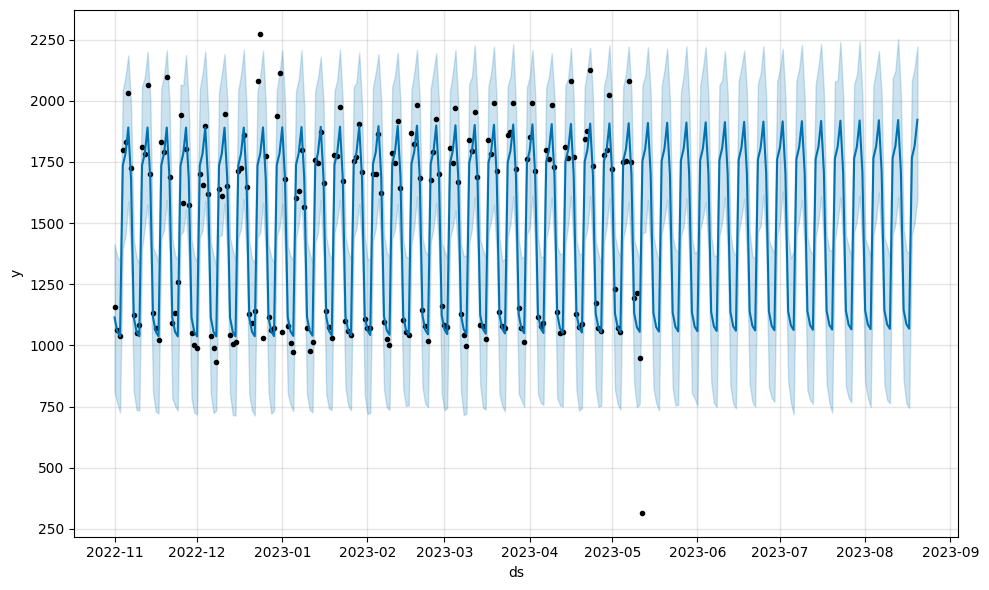

In [312]:
plot1 = m.plot(forecast)

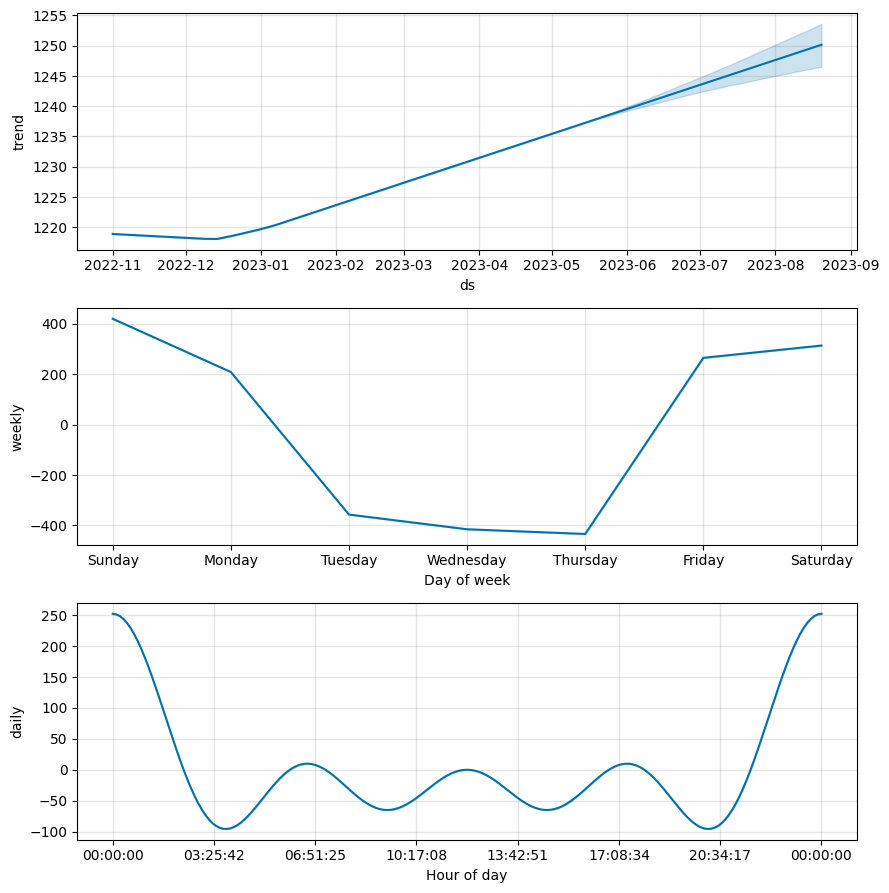

In [313]:
plot2=m.plot_components(forecast)

In [14]:
sns.set_style("darkgrid") # Others whitegrid, white, dark, ticks https://www.python-graph-gallery.com/104-seaborn-themes 

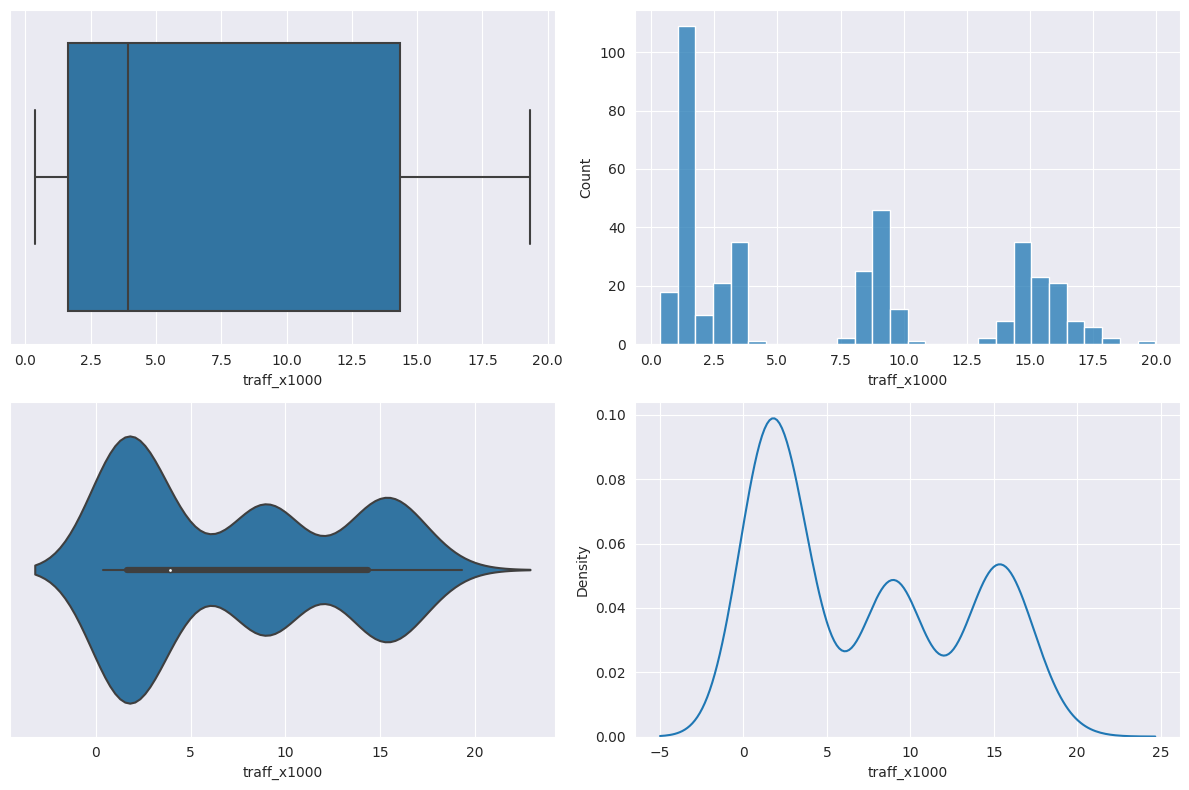

In [15]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=df_int, x='traff_x1000', orient='h', ax=axs[0,0])
sns.histplot(data=df_int,x='traff_x1000', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=df_int,x='traff_x1000', ax=axs[1,0])
sns.kdeplot(data=df_int, x='traff_x1000', ax=axs[1,1])
plt.tight_layout()

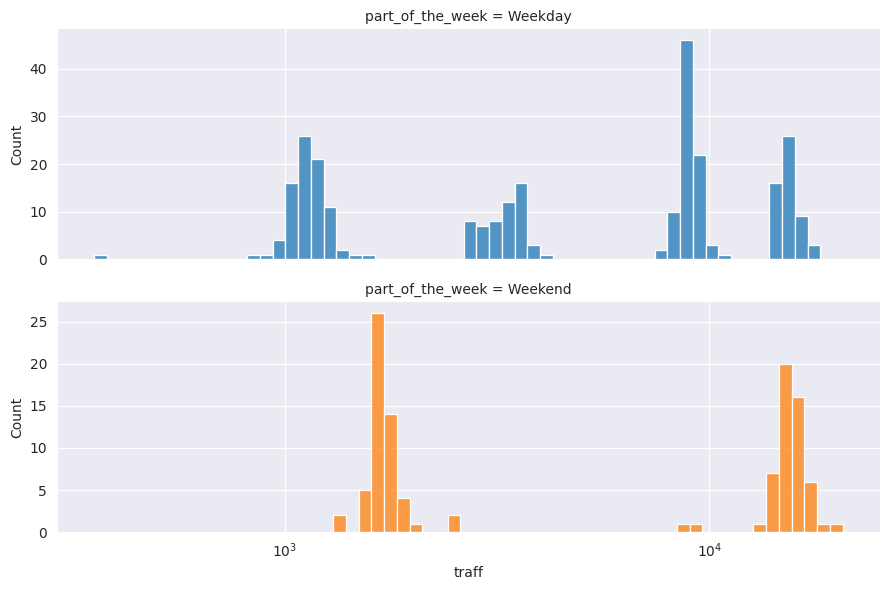

In [16]:
g = sns.FacetGrid(df_int, sharey=False, row='part_of_the_week',  hue='part_of_the_week',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='traff', log_scale=True, binwidth=0.03)

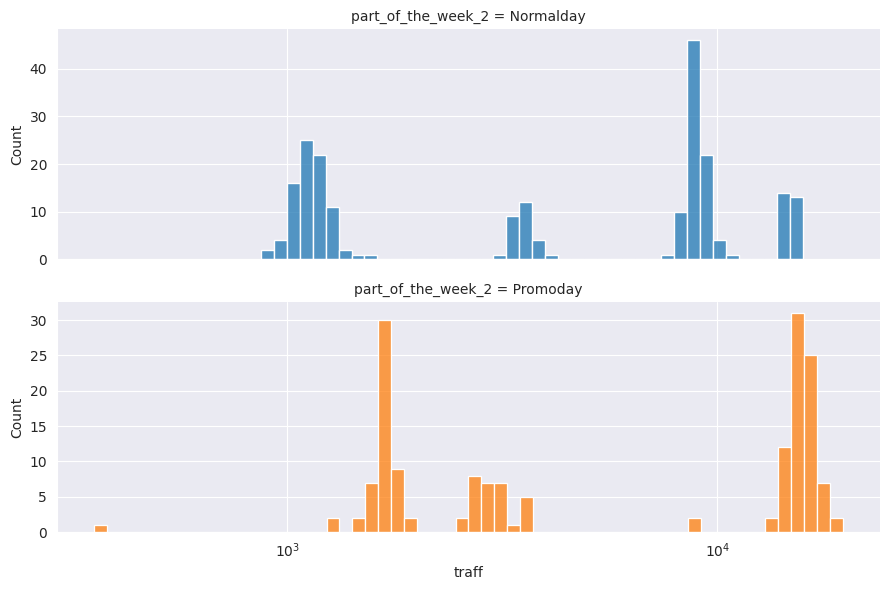

In [17]:
g = sns.FacetGrid(df_int, sharey=False, row='part_of_the_week_2',  hue='part_of_the_week_2',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='traff', log_scale=True, binwidth=0.03)

In [18]:
df_int['two_week_lag_traff'] = df_int['traff'].shift(periods=14, fill_value = 0) # We create a lagging variable of two weeks
df_int ['two_week_lag_traff_x1000']= df_int['two_week_lag_traff']/1000

In [19]:
df_int.head(16)

,CODIGO,traff,qty,DELAY,traff_x1000,qty_x1000,part_of_the_week,part_of_the_week_2,two_week_lag_traff,two_week_lag_traff_x1000
FECHA,,,,,,,,,,
2022-11-01,1,9798,810163,155,9.798,810.163,Weekday,Normalday,0,0.000
2022-11-01,1,1419,80677,139,1.419,80.677,Weekday,Normalday,0,0.000
2022-11-02,1,8928,743973,187,8.928,743.973,Weekday,Normalday,0,0.000
2022-11-02,1,1238,70199,161,1.238,70.199,Weekday,Normalday,0,0.000
2022-11-03,1,8709,728152,165,8.709,728.152,Weekday,Normalday,0,0.000
2022-11-03,1,1147,65234,146,1.147,65.234,Weekday,Normalday,0,0.000
2022-11-04,1,16132,1260035,145,16.132,1260.035,Weekday,Promoday,0,0.000
2022-11-04,1,3541,198094,129,3.541,198.094,Weekday,Promoday,0,0.000
2022-11-05,1,15359,1281010,162,15.359,1281.010,Weekend,Promoday,0,0.000


<Axes: xlabel='two_week_lag_traff_x1000', ylabel='traff_x1000'>

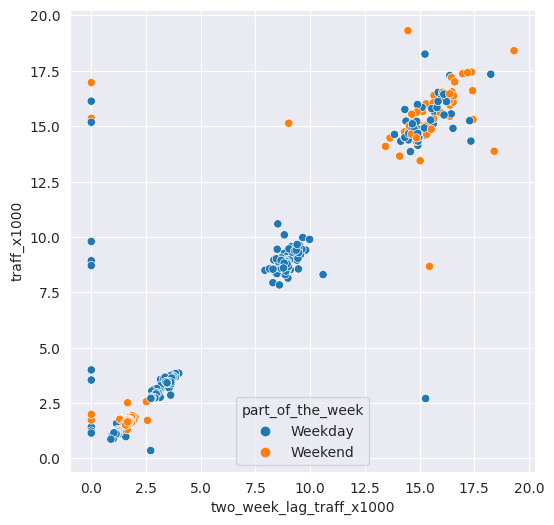

In [20]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=df_int, x='two_week_lag_traff_x1000', y='traff_x1000', hue='part_of_the_week')

<Axes: xlabel='qty_x1000', ylabel='traff_x1000'>

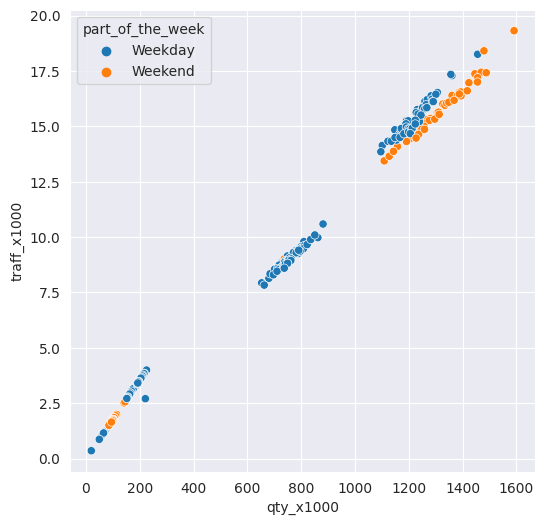

In [ ]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=df_int, x='qty_x1000', y='traff_x1000', hue='part_of_the_week')

In [21]:
df_int.describe()

,CODIGO,traff,qty,DELAY,traff_x1000,qty_x1000,two_week_lag_traff,two_week_lag_traff_x1000
count,386.0,386.000000,3.860000e+02,386.000000,386.000000,386.000000,386.000000,386.000000
mean,1.0,7215.095855,5.692829e+05,165.963731,7.215096,569.282876,6989.225389,6.989225
std,0.0,5875.968944,5.018571e+05,81.151798,5.875969,501.857137,5925.020283,5.925020
min,1.0,356.000000,2.016400e+04,127.000000,0.356000,20.164000,0.000000,0.000000
25%,1.0,1629.000000,9.235775e+04,145.000000,1.629000,92.357750,1510.750000,1.510750
50%,1.0,3924.500000,2.232240e+05,154.000000,3.924500,223.224000,3668.000000,3.668000
75%,1.0,14329.750000,1.148582e+06,167.000000,14.329750,1148.582250,14274.000000,14.274000
max,1.0,19319.000000,1.590954e+06,1277.000000,19.319000,1590.954000,19319.000000,19.319000
